# Queary 3 with Fillament Finding
In this section, a new data set was quearied to investigate the fillament finding tool and to investegare the relationship between logMstar and logAge

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import binned_statistic

In [2]:
GAMA3=pd.read_csv('/Users/lianysfeliciano/Cosmic_Fillaments/GAMA_3.csv')
GAMA3.head()

,CATAID,Z,nQ,Z_TONRY,logmstar,dellogmstar,logage,dellogage,metal,delmetal,...,Z.1,d,GroupID,BranchID,FilID,CATAID.2,X.1,Y.1,Z.2,TendrilID
0,6802,0.05054,4,0.051814,9.07603,0.131666,9.73361,0.251961,0.017558,0.009571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6806,0.33124,4,0.332854,10.97920,0.099166,9.73226,0.185493,0.008544,0.007267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6808,0.22936,4,0.230851,10.79160,0.098116,9.84259,0.141759,0.005238,0.004209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6810,0.32630,4,0.327908,11.11970,0.096136,9.77507,0.161527,0.010000,0.009512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6813,0.48457,4,0.486370,11.06130,0.096174,9.67202,0.181531,0.007012,0.005443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Refining Data 

In [3]:
dis=GAMA3['d']
Z=GAMA3['Z']
mass=GAMA3['logmstar']
age=GAMA3['logage']
gminusi=GAMA3 ['gminusi']

In [5]:
#Refining data 
dmask=GAMA3.d.notnull() #Used to remove all rows that contained NaN values for d
MassMask= GAMA3["logmstar"] >0 #Creatinng a Boolean Mask to refine data 
GAMA3=GAMA3[MassMask & dmask] #Applying masks to dataset 

GAMA3= GAMA3[(GAMA3["logmstar"] <12)]#Getting rid of weird outlier at 13 solar masses


In [6]:
#Pin Pointing Outlier with IQR Func
def IQR(col):
    """This Function will calculate the IQR as well as the 
        upper and lower bounds of a set of numbers with 84th and 16th percentiles
    """
    sorted(col)
    Q3,Q1= np.percentile(col,[84,16])
    IQR=Q3-Q1 
    lower_range = Q1 - (2.0 * IQR)
    upper_range = Q3 + (2.0 * IQR)
    #print(IQR, lower_range,upper_range)
    return lower_range,upper_range

IQR(age)

(9.305119999999999, 10.185770000000002)

In [7]:
#Getting Rid of outliers in data
lower_range , upper_range = IQR(age)

upper_outlier= GAMA3.logage> upper_range
lower_outlier=GAMA3.logage< lower_range
GAMA3.drop(GAMA3[(upper_outlier)|(lower_outlier)].index , inplace=True)

Text(0.5, 1.0, 'logAge vs logMass')

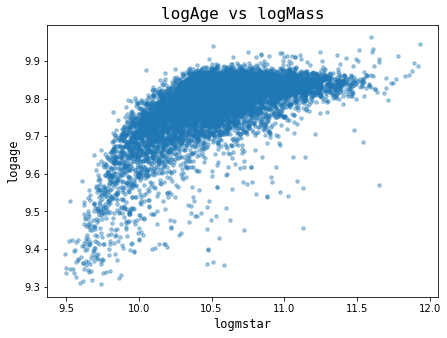

In [8]:
#Now that the data is further refined lets replot the graph above 
mass=GAMA3['logmstar']
age=GAMA3['logage']

plt.figure(facecolor="w",figsize=(7,5))
plt.scatter(mass,age, alpha = 0.4, s=12)
plt.xlabel("logmstar",font= "monospace", fontsize=12)
plt.ylabel("logage",font= "monospace", fontsize=12)
plt.title("logAge vs logMass", font= "monospace", fontsize=16)

## Point Density (Colored Plot)

Text(0.5, 1.0, 'logAge vs logMass')

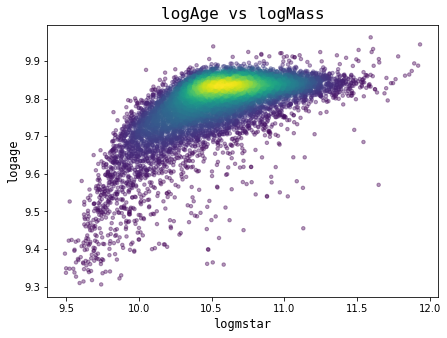

In [9]:
#Calculating the Point Density 
#Convinently there exists a function for that 

xy = np.vstack([mass,age])#vstack -> stack arrays in sequence vertically (row wise) 
z = gaussian_kde(xy)(xy) #still confused by what this is 


#Remaking graph but now colored by density
plt.figure(facecolor="w",figsize=(7,5))
plt.scatter(mass,age,c=z, alpha = 0.4, s=12)
plt.xlabel("logmstar",font= "monospace", fontsize=12)
plt.ylabel("logage",font= "monospace", fontsize=12)
plt.title("logAge vs logMass", font= "monospace", fontsize=16)

## Binnning and Applying Stats 

In [10]:
#Scipi has a function that will bin and take the median of the bin given the columns 
#scipy.stats.binned_statistic(x, values, statistic='mean', bins=10, range=None)
bin_median,bin_edges,bin_num=binned_statistic(mass,age,statistic='median',bins=25,range=(9.5,12.0))
print("Median",bin_median)
print("Bin Edges",bin_edges)
print("Bin Numbers",bin_num)

Median [9.37181  9.42825  9.52933  9.61626  9.674105 9.7124   9.73458  9.76568
 9.798185 9.818805 9.82415  9.82798  9.82949  9.830055 9.8341   9.83579
 9.8357   9.839705 9.8366   9.84072  9.84421  9.85983  9.84146  9.86905
 9.916215]
Bin Edges [ 9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8
 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12. ]
Bin Numbers [11  9 14 ...  8 11  9]


In [13]:
#calculating the Standard deviation to add error bars
Std,s_bin_edge,s_bin_num=binned_statistic(mass,age,statistic='std',bins=25,range=(9.5,12.0))
print("Std: ",Std)
print("Bin Edges: ",s_bin_edge)
print("Bin Numbers: ",s_bin_num)

bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

Std:  [0.05128774 0.06827926 0.07897715 0.0853816  0.08347628 0.07217961
 0.07041235 0.06281424 0.05839222 0.05702963 0.05207019 0.04570554
 0.04304707 0.04105081 0.03922391 0.03575593 0.03759602 0.02485066
 0.01969087 0.02745402 0.0448868  0.09531308 0.03271594 0.01272331
 0.028205  ]
Bin Edges:  [ 9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8
 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12. ]
Bin Numbers:  [11  9 14 ...  8 11  9]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


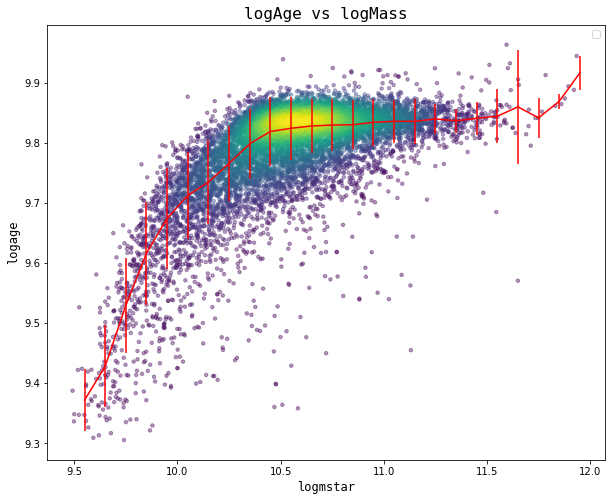

In [16]:
#Plotting refined data with binned values stats 
plt.figure(facecolor="w",figsize=(10,8))
plt.scatter(mass,age,c=z,cmap='viridis', alpha = 0.4, s=12)
### plt.hlines(bin_median, bin_edges[:-1], bin_edges[1:], color='crimson', lw=2,label='Medium Binned logage') 
plt.errorbar(bin_centers,bin_median,yerr=Std,c='r')

plt.xlabel("logmstar",font= "monospace", fontsize=12)
plt.ylabel("logage",font= "monospace", fontsize=12)
plt.title("logAge vs logMass", font= "monospace", fontsize=16)
plt.legend(fontsize=10)